In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Retina display
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

In [3]:
torch.manual_seed(42)
np.random.seed(42)


def true_function(x):
    return 2 * x + 3

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed


findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

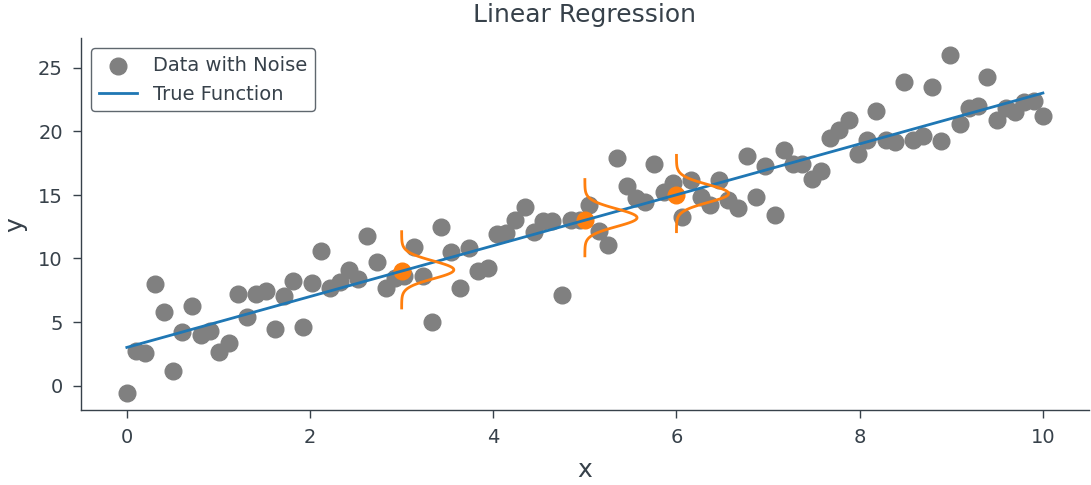

In [9]:
x_values = torch.linspace(0, 10, 100)
noise = torch.randn(100) * 2
y_values = true_function(x_values) + noise
x_values = x_values.view(-1, 1)
y_values = y_values.view(-1, 1)

mean = 3
stddev = 0.7
x = np.linspace(0, 6, 100)
pdf_values = (1.0 / (stddev * np.sqrt(2 * np.pi))) * \
    np.exp(-0.5 * ((x - mean) / stddev)**2)

plt.scatter(x_values, y_values, label='Data with Noise', color='gray')
plt.plot(x_values, true_function(x_values),
         label='True Function', color='tab:blue')
plt.plot(pdf_values+3, x+6.1, color='tab:orange')
plt.plot(pdf_values+6, x+12.1, color='tab:orange')
plt.plot(pdf_values+5, x+10.2, color='tab:orange')
plt.scatter(3, 9, color='tab:orange')
plt.scatter(6, 15, color='tab:orange')
plt.scatter(5, 13, color='tab:orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.savefig('figures/mle/true_function_noise_normal_lin_reg.pdf')

In [37]:
def animate(frame):
    plt.clf()

    if frame == 0:
        plt.plot(x_values, true_function(x_values),
                 label='True Function', color='tab:blue')
    elif frame == 1:
        plt.plot(x_values, true_function(x_values),
                 label='True Function', color='tab:blue')
        plt.scatter(x_values, y_values, label='Data with Noise', color='gray')
    elif frame == 2:
        plt.plot(x_values, true_function(x_values),
                 label='True Function', color='tab:blue')
        plt.scatter(x_values, y_values, label='Data with Noise', color='gray')
        plt.plot(pdf_values+3, x+6.1, color='tab:orange')
        plt.plot(pdf_values+6, x+12.1, color='tab:orange')
        plt.plot(pdf_values+5, x+10.2, color='tab:orange')
        plt.scatter(3, 9, color='tab:orange')
        plt.scatter(6, 15, color='tab:orange')
        plt.scatter(5, 13, color='tab:orange')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

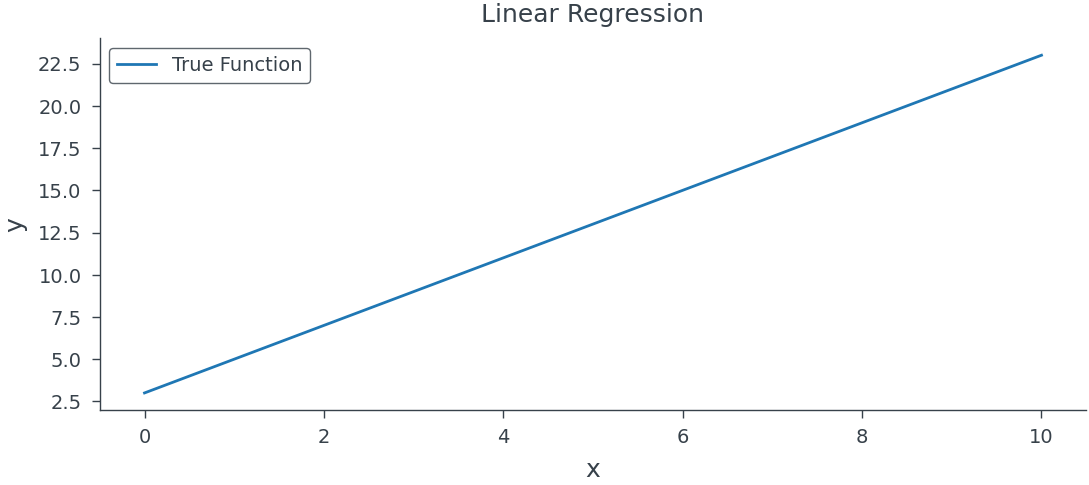

In [38]:
fig = plt.figure()
fig.set_facecolor('white')
anim = FuncAnimation(fig, animate, frames=3, interval=2000, repeat=True)
HTML(anim.to_jshtml())